In [1]:
import os
import pathlib
import pandas as pd
import numpy as np
from skimage import io
import sklearn.preprocessing as preproc
import matplotlib.pyplot as plt
import scipy.linalg as lng
from tqdm import tqdm

In [3]:
data_path = '../data/Faces/'
labels_path = '../data/labels.csv'

labels = pd.read_csv(labels_path)
labels_columns = ['age', 'gender', 'race']
labels = pd.DataFrame(data=labels.values, columns=labels_columns)

dirs = os.listdir(data_path)
no_of_images = len(dirs)

# Open one image to get dimensions
k = 350
img_rnd = io.imread(data_path+f'{k}.jpg')
h,w,_ = img_rnd.shape
del img_rnd

batch_ratio = 10
bathc_len = no_of_images//batch_ratio
current_index=0



## Create the binary. Open it in append mode

k = 100
X = np.empty((k,h*w))


for i in tqdm(range(k)):
    print(f'Loading image {i+1}/{k}')
    a = io.imread(data_path+f'{i}.jpg',as_gray=True)
    X[i,:] = a.reshape(1,-1)
    del a



 16%|████████████▊                                                                   | 16/100 [00:00<00:00, 155.22it/s]

Loading image 1/100
Loading image 2/100
Loading image 3/100
Loading image 4/100
Loading image 5/100
Loading image 6/100
Loading image 7/100
Loading image 8/100
Loading image 9/100
Loading image 10/100
Loading image 11/100
Loading image 12/100
Loading image 13/100
Loading image 14/100
Loading image 15/100
Loading image 16/100
Loading image 17/100
Loading image 18/100
Loading image 19/100
Loading image 20/100
Loading image 21/100
Loading image 22/100
Loading image 23/100
Loading image 24/100
Loading image 25/100
Loading image 26/100
Loading image 27/100
Loading image 28/100


 50%|████████████████████████████████████████                                        | 50/100 [00:00<00:00, 162.65it/s]

Loading image 29/100
Loading image 30/100
Loading image 31/100
Loading image 32/100
Loading image 33/100
Loading image 34/100
Loading image 35/100
Loading image 36/100
Loading image 37/100
Loading image 38/100
Loading image 39/100
Loading image 40/100
Loading image 41/100
Loading image 42/100
Loading image 43/100
Loading image 44/100
Loading image 45/100
Loading image 46/100
Loading image 47/100
Loading image 48/100
Loading image 49/100
Loading image 50/100
Loading image 51/100
Loading image 52/100
Loading image 53/100
Loading image 54/100
Loading image 55/100
Loading image 56/100
Loading image 57/100
Loading image 58/100
Loading image 59/100
Loading image 60/100


 84%|███████████████████████████████████████████████████████████████████▏            | 84/100 [00:00<00:00, 164.40it/s]

Loading image 61/100
Loading image 62/100
Loading image 63/100
Loading image 64/100
Loading image 65/100
Loading image 66/100
Loading image 67/100
Loading image 68/100
Loading image 69/100
Loading image 70/100
Loading image 71/100
Loading image 72/100
Loading image 73/100
Loading image 74/100
Loading image 75/100
Loading image 76/100
Loading image 77/100
Loading image 78/100
Loading image 79/100
Loading image 80/100
Loading image 81/100
Loading image 82/100
Loading image 83/100
Loading image 84/100
Loading image 85/100
Loading image 86/100
Loading image 87/100
Loading image 88/100
Loading image 89/100
Loading image 90/100
Loading image 91/100


100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 162.43it/s]

Loading image 92/100
Loading image 93/100
Loading image 94/100
Loading image 95/100
Loading image 96/100
Loading image 97/100
Loading image 98/100
Loading image 99/100
Loading image 100/100


In [4]:
U,S,Vh = lng.svd(X, full_matrices=False)
V = Vh.T
del Vh

Z = U*S

cumsum = np.cumsum(S*S/(S*S).sum())

threshold = 0.9

def plot_eigenface(V,eigenface=1):
    i = eigenface-1
    plt.subplot(1,2,1)
    plt.imshow( (V[:,i]).reshape(h,w), cmap='gray')
    plt.xticks(())
    plt.yticks(())

    plt.subplot(1,2,2)
    plt.imshow((-V[:,i]).reshape(h,w), cmap='gray')
    plt.xticks(())
    plt.yticks(())

    plt.show()
    

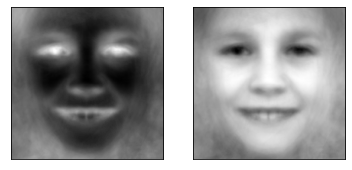

In [5]:
plot_eigenface(V, 1)